In [74]:
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

# Cargar dataset 'iris' de seaborn
data = sns.load_dataset('iris')
print(data.head())
print("_____________________________________________")
print(data.info())
print("_____________________________________________")
print(data.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
_____________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
_____________________________________________
       sepal_length  sepal_width  petal_length  petal_width
co

In [75]:
## SEPARACIÓN DE LOS DATOS ##
# Separar características y etiquetas
X = data.drop(columns='species')  # Características
y = data['species']  # Etiquetas
# Partición de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Mostrar las longitudes de los conjuntos resultantes
print("The train set length is: ", len(X_train))
print("The test set length is: ", len(X_test))
# Mostrar las primeras filas de los conjuntos de entrenamiento y prueba
print("\nFirst few rows of the training set:")
print(X_train.head())
print(y_train.head())
print("\nFirst few rows of the test set:")
print(X_test.head())
print(y_test.head())

The train set length is:  120
The test set length is:  30

First few rows of the training set:
    sepal_length  sepal_width  petal_length  petal_width
22           4.6          3.6           1.0          0.2
15           5.7          4.4           1.5          0.4
65           6.7          3.1           4.4          1.4
11           4.8          3.4           1.6          0.2
42           4.4          3.2           1.3          0.2
22        setosa
15        setosa
65    versicolor
11        setosa
42        setosa
Name: species, dtype: object

First few rows of the test set:
     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
73     versicolor
18         setosa
118     virginica
78     versico

In [76]:
## VISUALIZACIÓN DE DATOS ##
# a) Gráfica de Dispersión
fig = px.scatter(data, x='sepal_width', y='petal_length', color='species', title='Características de Sépalo vs Pétalo')
fig.show()

# b) Histograma
fig = px.histogram(data, nbins=8, x='petal_length', title='Histograma')
fig.update_traces(marker_line_width=1,marker_line_color="white")
fig.show()

# c) Gráfica de Barras
conteo_especie = data["species"].value_counts().reset_index()
fig = px.bar(conteo_especie, x="species", y='count', title='Conteo por Especie')
fig.show()

# d) Diagrama de Caja
fig = px.box(data, x='sepal_length', y='species', title='Diagrama de Caja')
fig.show()


In [77]:
# Data transformation
data_num = data.drop("species", axis=1)
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, list(data_num)),
])
data_num_prepared = full_pipeline.fit_transform(data_num)

# Save and load pipeline
joblib.dump(full_pipeline, 'pipeline.joblib')
pipeline_loaded = joblib.load('pipeline.joblib')

X_train_prepared = pipeline_loaded.transform(X_train)
X_test_prepared = pipeline_loaded.transform(X_test)

In [78]:
## Entrenamiento del Modelo ##
# Regresión Logística

# Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],              # Regularization type
    'solver': ['liblinear', 'lbfgs'], # Optimization algorithm
    'max_iter': [250, 275,290,239,240]    # Number of iterations
}
#Setup
grid_search = GridSearchCV(estimator=LogisticRegression(),
        param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the model
grid_search.fit(X_train_prepared, y_train)
# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

model = LogisticRegression(C=best_params['C'], max_iter=best_params['max_iter'], penalty=best_params['penalty'], solver=best_params['solver'])
model.fit(X_train_prepared, y_train)
y_pred = model.predict(X_test_prepared)

#Save model
joblib.dump(model, "logReg.pkl")
logReg_loaded = joblib.load("logReg.pkl")

Best Parameters: {'C': 1, 'max_iter': 250, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9583333333333334


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



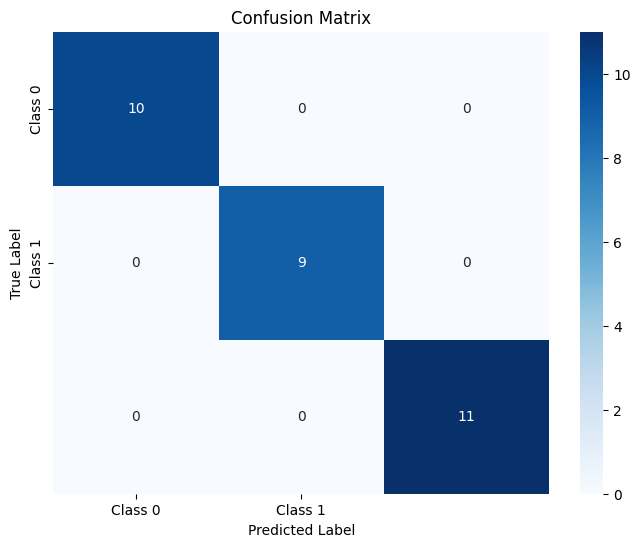

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y.unique()))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Cada fila de la matriz de confusión corresponde a la clase verdadera y cada columna corresponde a la clase predicha. Los elementos diagonales (10, 9, 11) representan las instancias clasificadas correctamente para cada clase, mientras que los elementos fuera de diagonal son todos cero, mostrando que no hay clasificaciones erróneas.